In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# FedLR HuGaDB: 350 samples per client with noise_std_values = [0.1 , 0.3 , 0.5 , 0.7 ,1 , 2] 

In [ ]:

custom_colors = ['blue', 'orange', 'green', 'red', 'purple', 'brown' , 'skyblue', 'gray', 'pink']

cmap = ListedColormap(custom_colors)
markers = ['x','o','s','d', '*','v', '^', '<', '>','h', 'D']
linestyles = ['-', '-.' , ':']

noise_std_values = [0.1 , 0.3 , 0.5 , 0.7 ,1 , 2] 
corrupted_clients_counts = [0, 1 , 2 , 3 , 4 , 5, 6 ,7 , 8 , 9 , 10]

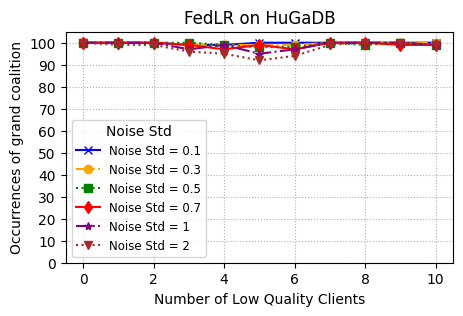

In [ ]:
df = pd.read_csv('.../results/FedLR_HuGaDB_LQC_0_to_10//nash_occurrence_results.csv', sep=',')
df = df.rename(columns={'Number of Bad Clients': 'num_bad_clients'})

results = df.set_index('num_bad_clients').to_dict(orient='list')
results = {float(k): v for k, v in results.items()}

plt.figure(figsize=(5, 3))
for i, noise in enumerate(noise_std_values):
    color = cmap(i) 
    marker = markers[i % len(markers)]
    linestyle = linestyles[i % len(linestyles)]
    
    plt.plot(corrupted_clients_counts, results[noise],
             marker=marker, linestyle=linestyle, color=color,
             label=f'Noise Std = {noise}')

plt.yticks(np.arange(0, 101, 10))
plt.ylim(0, 105)
plt.xlabel("Number of Low Quality Clients")
plt.ylabel("Occurrences of grand coalition")
plt.legend(title="Noise Std", prop={'size': 8.5})
plt.title('FedLR on HuGaDB')
plt.grid(linestyle=':')
plt.savefig('.../fig/fedlr_hugadb.pdf')
plt.show()

# FedLR HuGaDB: 350 samples per client with noise_std_values = [0.1 , 0.3 , 0.5 , 0.7 ,1 , 2 , 3 , 4 , 5] 

In [5]:
custom_colors = ['blue', 'orange', 'green', 'red', 'purple', 'brown' , 'skyblue', 'gray', 'pink']

cmap = ListedColormap(custom_colors)
markers = ['x','o','s','d', '*','v', '^', '<', '>','h', 'D']
linestyles = ['-', '-.' , ':']

noise_std_values = [0.1 , 0.3 , 0.5 , 0.7 ,1 , 2 , 3 ,4 ,5] 
corrupted_clients_counts = [0, 1 , 2 , 3 , 4 , 5, 6 ,7 , 8 , 9 , 10]

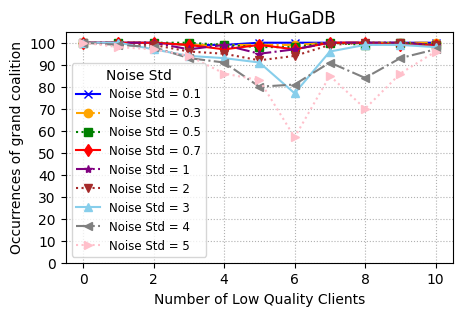

In [ ]:
df = pd.read_csv('.../results/FedLR_HuGaDB_LQC_0_to_10//nash_occurrence_results.csv', sep=',')
df = df.rename(columns={'Number of Bad Clients': 'num_bad_clients'})

results = df.set_index('num_bad_clients').to_dict(orient='list')
results = {float(k): v for k, v in results.items()}

plt.figure(figsize=(5, 3))
for i, noise in enumerate(noise_std_values):
    color = cmap(i) 
    marker = markers[i % len(markers)]
    linestyle = linestyles[i % len(linestyles)]
    
    plt.plot(corrupted_clients_counts, results[noise],
             marker=marker, linestyle=linestyle, color=color,
             label=f'Noise Std = {noise}')

plt.yticks(np.arange(0, 101, 10))
plt.ylim(0, 105)
plt.xlabel("Number of Low Quality Clients")
plt.ylabel("Occurrences of grand coalition")
plt.legend(title="Noise Std", prop={'size': 8.5})
plt.title('FedLR on HuGaDB')
plt.grid(linestyle=':')
plt.savefig('.../fig/fedlr_hugadb_more_noise.pdf')
plt.show()

# FedFor HuGaDB: 350 samples per client with noise_std_values = [0.1 , 0.3 , 0.5 , 0.7 ,1 , 2] 

In [7]:
custom_colors = ['blue', 'orange', 'green', 'red', 'purple', 'brown' , 'skyblue', 'gray', 'pink']

cmap = ListedColormap(custom_colors)
markers = ['x','o','s','d', '*','v', '^', '<', '>','h', 'D']
linestyles = ['-', '-.' , ':']

noise_std_values = [0.1 , 0.3 , 0.5 , 0.7 ,1 , 2] 
corrupted_clients_counts = [0, 1 , 2 , 3 , 4 , 5, 6 ,7 , 8 , 9 , 10]

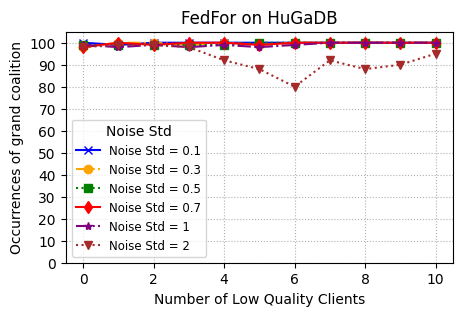

In [ ]:
df = pd.read_csv('.../results/FedFor_HuGaDB_LQC_0_to_10/nash_occurrence_results.csv', sep=',')
df = df.rename(columns={'Number of Bad Clients': 'num_bad_clients'})

results = df.set_index('num_bad_clients').to_dict(orient='list')
results = {float(k): v for k, v in results.items()}

plt.figure(figsize=(5, 3))
for i, noise in enumerate(noise_std_values):
    color = cmap(i) 
    marker = markers[i % len(markers)]
    linestyle = linestyles[i % len(linestyles)]
    
    plt.plot(corrupted_clients_counts, results[noise],
             marker=marker, linestyle=linestyle, color=color,
             label=f'Noise Std = {noise}')

plt.yticks(np.arange(0, 101, 10))
plt.ylim(0, 105)
plt.xlabel("Number of Low Quality Clients")
plt.ylabel("Occurrences of grand coalition")
plt.legend(title="Noise Std", prop={'size': 8.5})
plt.title('FedFor on HuGaDB')
plt.grid(linestyle=':')
plt.savefig('.../fig/fedfor_hugadb.pdf')
plt.show()

# FedFor HuGaDB: 350 samples per client with noise_std_values = [0.1 , 0.3 , 0.5 , 0.7 ,1 , 2 , 3 , 4 , 5] 

In [9]:
custom_colors = ['blue', 'orange', 'green', 'red', 'purple', 'brown' , 'skyblue', 'gray', 'pink']

cmap = ListedColormap(custom_colors)
markers = ['x','o','s','d', '*','v', '^', '<', '>','h', 'D']
linestyles = ['-', '-.' , ':']

noise_std_values = [0.1 , 0.3 , 0.5 , 0.7 ,1 , 2 , 3 ,4 ,5] 
corrupted_clients_counts = [0, 1 , 2 , 3 , 4 , 5, 6 ,7 , 8 , 9 , 10]

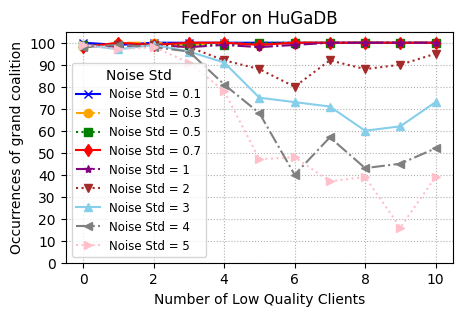

In [ ]:
df = pd.read_csv('.../results/FedFor_HuGaDB_LQC_0_to_10/nash_occurrence_results.csv', sep=',')
df = df.rename(columns={'Number of Bad Clients': 'num_bad_clients'})

results = df.set_index('num_bad_clients').to_dict(orient='list')
results = {float(k): v for k, v in results.items()}

plt.figure(figsize=(5, 3))
for i, noise in enumerate(noise_std_values):
    color = cmap(i) 
    marker = markers[i % len(markers)]
    linestyle = linestyles[i % len(linestyles)]
    
    plt.plot(corrupted_clients_counts, results[noise],
             marker=marker, linestyle=linestyle, color=color,
             label=f'Noise Std = {noise}')

plt.yticks(np.arange(0, 101, 10))
plt.ylim(0, 105)
plt.xlabel("Number of Low Quality Clients")
plt.ylabel("Occurrences of grand coalition")
plt.legend(title="Noise Std", prop={'size': 8.5})
plt.title('FedFor on HuGaDB')
plt.grid(linestyle=':')
plt.savefig('.../fig/fedfor_hugadb_more_noise.pdf')
plt.show()

# FedLR Spambase: 350 samples per client with noise_std_values = [0.1 , 0.3 , 0.5 , 0.7 ,1 , 2] 

In [11]:
custom_colors = ['blue', 'orange', 'green', 'red', 'purple', 'brown' , 'skyblue', 'gray', 'pink']

cmap = ListedColormap(custom_colors)
markers = ['x','o','s','d', '*','v', '^', '<', '>','h', 'D']
linestyles = ['-', '-.' , ':']

noise_std_values = [0.1 , 0.3 , 0.5 , 0.7 ,1 , 2] 
corrupted_clients_counts = [0, 1 , 2 , 3 , 4 , 5, 6 ,7 , 8 , 9 , 10]

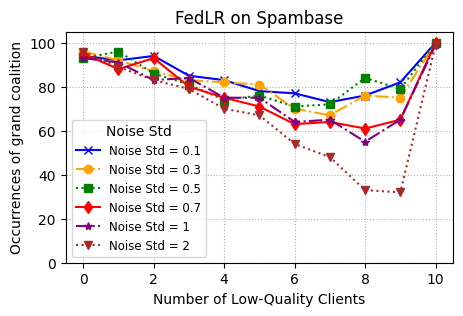

In [ ]:
df = pd.read_csv('.../results/FedLR_Spambase_LQC_0_to_10/nash_occurrence_results.csv', sep=',')
df = df.rename(columns={'Number of Bad Clients': 'num_bad_clients'})

results = df.set_index('num_bad_clients').to_dict(orient='list')
results = {float(k): v for k, v in results.items()}


plt.figure(figsize=(5, 3))
for i, noise in enumerate(noise_std_values):
    color = cmap(i) 
    marker = markers[i % len(markers)]
    linestyle = linestyles[i % len(linestyles)]
    
    plt.plot(corrupted_clients_counts, results[noise],
             marker=marker, linestyle=linestyle, color=color,
             label=f'Noise Std = {noise}')
    
plt.yticks(np.arange(0, 101, 20))
plt.ylim(0, 105)
plt.xlabel('Number of Low-Quality Clients')
plt.ylabel('Occurrences of grand coalition')
plt.title('FedLR on Spambase')
plt.grid(linestyle=':')
plt.legend(title="Noise Std", prop={'size': 8.5})
plt.savefig('.../fig/fedlr_spambase.pdf')
plt.show()

# FedLR Spambase: 350 samples per client with noise_std_values = [0.1 , 0.3 , 0.5 , 0.7 ,1 , 2 , 3 , 4 , 5] 

In [13]:
custom_colors = ['blue', 'orange', 'green', 'red', 'purple', 'brown' , 'skyblue', 'gray', 'pink']

cmap = ListedColormap(custom_colors)
markers = ['x','o','s','d', '*','v', '^', '<', '>','h', 'D']
linestyles = ['-', '-.' , ':']

noise_std_values = [0.1 , 0.3 , 0.5 , 0.7 ,1 , 2 , 3 ,4 ,5] 
corrupted_clients_counts = [0, 1 , 2 , 3 , 4 , 5, 6 ,7 , 8 , 9 , 10]

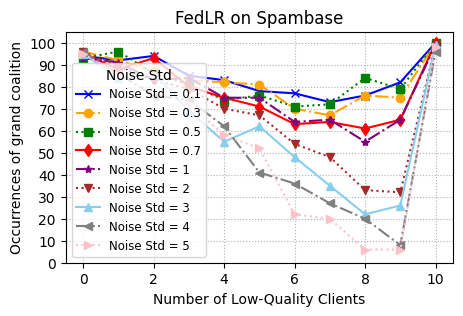

In [ ]:
df = pd.read_csv('.../results/FedLR_Spambase_LQC_0_to_10/nash_occurrence_results.csv', sep=',')
df = df.rename(columns={'Number of Bad Clients': 'num_bad_clients'})

results = df.set_index('num_bad_clients').to_dict(orient='list')
results = {float(k): v for k, v in results.items()}

plt.figure(figsize=(5, 3))
for i, noise in enumerate(noise_std_values):
    color = cmap(i) 
    marker = markers[i % len(markers)]
    linestyle = linestyles[i % len(linestyles)]
    
    plt.plot(corrupted_clients_counts, results[noise],
             marker=marker, linestyle=linestyle, color=color,
             label=f'Noise Std = {noise}')
    
plt.yticks(np.arange(0, 101, 10))
plt.ylim(0, 105)
plt.xlabel('Number of Low-Quality Clients')
plt.ylabel('Occurrences of grand coalition')
plt.title('FedLR on Spambase')
plt.grid(linestyle=':')
plt.legend(title="Noise Std", prop={'size': 8.5})
plt.savefig('.../fig/fedlr_spambase_more_noise.pdf')
plt.show()

# FedFor Spambase: 350 samples per client with noise_std_values = [0.1 , 0.3 , 0.5 , 0.7 ,1 , 2] 

In [16]:
custom_colors = ['blue', 'orange', 'green', 'red', 'purple', 'brown' , 'skyblue', 'gray', 'pink']

cmap = ListedColormap(custom_colors)
markers = ['x','o','s','d', '*','v', '^', '<', '>','h', 'D']
linestyles = ['-', '-.' , ':']

noise_std_values = [0.1 , 0.3 , 0.5 , 0.7 ,1 , 2] 
corrupted_clients_counts = [0, 1 , 2 , 3 , 4 , 5, 6 ,7 , 8 , 9 , 10]

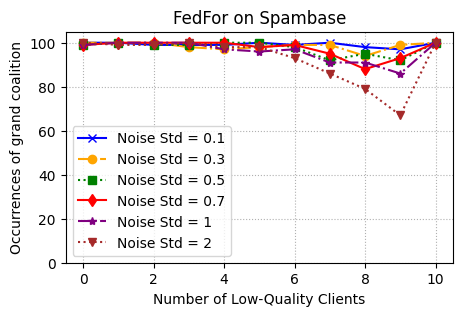

In [ ]:
df = pd.read_csv('.../results/FedFor_Spambase_LQC_0_to_10/nash_occurrence_results.csv', sep=',')
df = df.rename(columns={'Number of Bad Clients': 'num_bad_clients'})

results = df.set_index('num_bad_clients').to_dict(orient='list')
results = {float(k): v for k, v in results.items()}


plt.figure(figsize=(5, 3))
for i, noise in enumerate(noise_std_values):
    color = cmap(i) 
    marker = markers[i % len(markers)]
    linestyle = linestyles[i % len(linestyles)]
    
    plt.plot(corrupted_clients_counts, results[noise],
             marker=marker, linestyle=linestyle, color=color,
             label=f'Noise Std = {noise}')
    
plt.yticks(np.arange(0, 101, 20))
plt.ylim(0, 105)
plt.xlabel('Number of Low-Quality Clients')
plt.ylabel('Occurrences of grand coalition')
plt.title('FedFor on Spambase')
plt.grid(linestyle=':')
plt.legend()
plt.savefig('.../fig/fedfor_spambase.pdf')
plt.show()

# FedFor Spambase: 350 samples per client with noise_std_values = [0.1 , 0.3 , 0.5 , 0.7 ,1 , 2 , 3 , 4 , 5] 

In [18]:
custom_colors = ['blue', 'orange', 'green', 'red', 'purple', 'brown' , 'skyblue', 'gray', 'pink']

cmap = ListedColormap(custom_colors)
markers = ['x','o','s','d', '*','v', '^', '<', '>','h', 'D']
linestyles = ['-', '-.' , ':']

noise_std_values = [0.1 , 0.3 , 0.5 , 0.7 ,1 , 2 , 3 ,4 ,5] 
corrupted_clients_counts = [0, 1 , 2 , 3 , 4 , 5, 6 ,7 , 8 , 9 , 10]

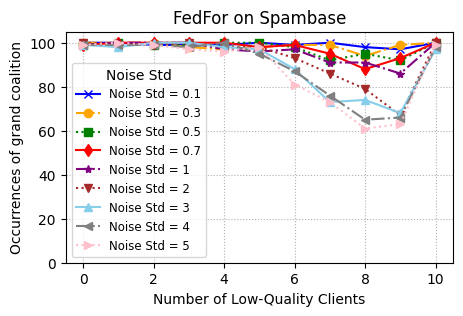

In [ ]:
df = pd.read_csv('.../results/FedFor_Spambase_LQC_0_to_10/nash_occurrence_results.csv', sep=',')
df = df.rename(columns={'Number of Bad Clients': 'num_bad_clients'})

results = df.set_index('num_bad_clients').to_dict(orient='list')
results = {float(k): v for k, v in results.items()}

plt.figure(figsize=(5, 3))
for i, noise in enumerate(noise_std_values):
    color = cmap(i) 
    marker = markers[i % len(markers)]
    linestyle = linestyles[i % len(linestyles)]
    
    plt.plot(corrupted_clients_counts, results[noise],
             marker=marker, linestyle=linestyle, color=color,
             label=f'Noise Std = {noise}')
    
plt.yticks(np.arange(0, 101, 20))
plt.ylim(0, 105)
plt.xlabel('Number of Low-Quality Clients')
plt.ylabel('Occurrences of grand coalition')
plt.title('FedFor on Spambase')
plt.grid(linestyle=':')
plt.legend(title="Noise Std", prop={'size': 8.5})
plt.savefig('.../fig/fedfor_spambase_more_noise.pdf')
plt.show()